In [1]:
import seaborn as sns
import scipy
import numpy as np
from matplotlib import pyplot as plt
import imageio
from IPython.display import Image, display
import matplotlib.colors as colors
import pandas as pd
import os

In [4]:
path_eco_1 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_eco_R5_seuil10_infl102_1/"
path_eco_2 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_eco_R5_seuil10_infl102_1/"

path_letkf_1 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_LETKF_Sakov_R10_infl102_1/"
path_letkf_2 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_LETKF_Sakov_R10_infl102_2/"
""" path_letkf_3 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_LETKF_Sakov_R10_infl102_3/"
path_letkf_4 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_LETKF_Sakov_R10_infl102_4/"
path_letkf_5 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_LETKF_Sakov_R10_infl102_5/" """

path_cluster_1 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_1/"
path_cluster_2 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_2/"
""" path_cluster_3 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_3/"
path_cluster_4 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_4/"
path_cluster_5 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_5/" """

' path_cluster_3 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_3/"\npath_cluster_4 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_4/"\npath_cluster_5 = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_5/" '

## Chargement data

In [5]:
# Charger les matrices à partir des fichiers
file_paths_truth = [
    f"{path_cluster_1}truth/truth_{i}.npy" for i in range(150, 1001, 5)
]

arrays_truth = [np.load(file_path) for file_path in file_paths_truth]


# Reshave les matrices en 2D (129, 129)
arrays_reshaved_truth = [array.reshape((129, 129),order='F') for array in arrays_truth]

arrays_av_cluster = [] # pour les résultats sur la moyenne des membres
arrays_full_av_cluster = [] # pour les résultats sur le spread : on a besoin de garder tout l'ensemble
# Charger les matrices à partir des fichiers
file_paths_1 = [
    f"{path_cluster_1}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_1]
arrays_full_av_cluster.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_cluster.append(arrays_av)
file_paths_2 = [
    f"{path_cluster_2}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_2]
arrays_full_av_cluster.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_cluster.append(arrays_av)
""" file_paths_3 = [
    f"{path_cluster_3}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_3]
arrays_full_av_cluster.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
#print(np.shape(arrays_av))
arrays_av_cluster.append(arrays_av) """
#print(np.shape(arrays_av_cluster))

# On moyenne sur les différentes xps
arrays_full_av_cluster = np.mean(arrays_full_av_cluster,axis=0) 
arrays_mean_cluster_av = np.mean(arrays_av_cluster,axis=0)
#print(np.shape(arrays_mean_cluster_av))



arrays_av_letkf = []
arrays_full_av_letkf = []
# Charger les matrices à partir des fichiers
file_paths_1 = [
    f"{path_letkf_1}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_1]
arrays_full_av_letkf.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_letkf.append(arrays_av)
file_paths_2 = [
    f"{path_letkf_2}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_2]
arrays_full_av_letkf.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_letkf.append(arrays_av)
""" file_paths_3 = [
    f"{path_letkf_3}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_3]
arrays_full_av_letkf.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_letkf.append(arrays_av)"""
arrays_full_av_letkf = np.mean(arrays_full_av_letkf,axis=0)
arrays_mean_letkf_av = np.mean(arrays_av_letkf,axis=0)

arrays_av_eco = [] # pour les résultats sur la moyenne des membres
arrays_full_av_eco = [] # pour les résultats sur le spread : on a besoin de garder tout l'ensemble
# Charger les matrices à partir des fichiers
file_paths_1 = [
    f"{path_eco_1}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_1]
arrays_full_av_eco.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_eco.append(arrays_av)
file_paths_2 = [
    f"{path_eco_2}E_ap/E_ap_{i}.npy" for i in range(150, 1001, 5)
]
arrays_av = [np.load(file_path) for file_path in file_paths_2]
arrays_full_av_eco.append(arrays_av)
arrays_av = [np.mean(array,axis=0) for array in arrays_av]
arrays_av_eco.append(arrays_av)
arrays_full_av_eco = np.mean(arrays_full_av_letkf,axis=0)
arrays_mean_eco_av = np.mean(arrays_av_eco,axis=0)



## Comparaison RMSE

## Comparaison moyenne RMSE

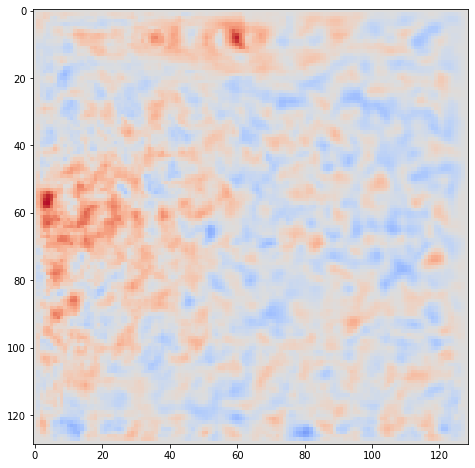

In [ ]:

def compute_rmse(array1, array2):
    return np.sqrt((array1 - array2)**2)

arrays_rmse_cluster_av = [compute_rmse(array1,array2) for array1,array2 in zip(arrays_truth,arrays_mean_cluster_av)]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_cluster_RMSE_av = [array.reshape((129, 129),order='F') for array in arrays_rmse_cluster_av]


arrays_rmse_letkf_av = [compute_rmse(array1,array2) for array1,array2 in zip(arrays_truth,arrays_mean_letkf_av)]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_letkf_RMSE_av = [array.reshape((129, 129),order='F') for array in arrays_rmse_letkf_av]


# Définir les limites de l'échelle de couleur
#vmin = min(min(array.min() for array in arrays_reshaped_cluster_RMSE_av), min(array.min() for array in arrays_reshaped_letkf_RMSE_av))
#vmax = max(max(array.max() for array in arrays_reshaped_cluster_RMSE_av), max(array.max() for array in arrays_reshaped_letkf_RMSE_av))


mean_diff = np.zeros((129,129))
for i, (rmse_cluster, rmse_classique) in enumerate(zip(arrays_reshaped_cluster_RMSE_av, arrays_reshaped_letkf_RMSE_av)):
    # Calculer la différence entre les matrices
    difference = rmse_classique - rmse_cluster
    mean_diff += difference
    
mean_diff = mean_diff/len(arrays_reshaped_cluster_RMSE_av)
#np.save(path_cluster_2+"mean_diff_3xp.npy", mean_diff)

# Définir une colormap personnalisée
cmap = plt.get_cmap('coolwarm')

# Normaliser pour centrer sur 0
norm = colors.TwoSlopeNorm(vmin=mean_diff.min(), vcenter=0, vmax=mean_diff.max())

plt.figure(figsize=(8,8))
# Créer une image avec plt.imshow
plt.imshow(mean_diff, cmap=cmap, vmin = -0.25, vmax = 0.25, interpolation='nearest')
#plt.imshow(mean_diff, cmap=cmap,norm = norm, interpolation='nearest')

# Ajouter une barre de couleur
#plt.colorbar()

# Afficher le graphique
#plt.title(f"Différence moyenne de la RMSE après assimilation \n Bleu : RMSE LETKF  < RMSE LETKF cluster \n Rouge : RMSE LETKF cluster < RMSE LETKF")
#plt.savefig(path_cluster_2+"diff_rmse_moyenne_3xp_sans_colorbar.eps", format='eps')
plt.show()




### Différence version eco / version lourde

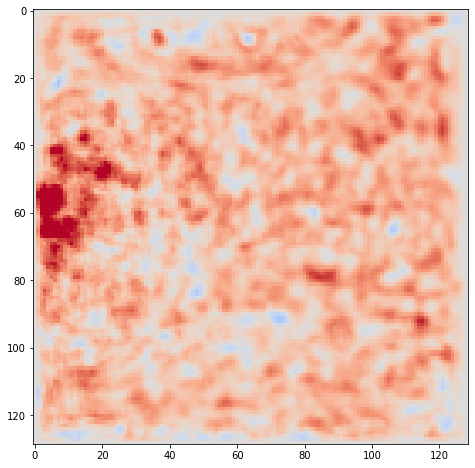

In [7]:
arrays_rmse_cluster_av = [compute_rmse(array1,array2) for array1,array2 in zip(arrays_truth,arrays_mean_cluster_av)]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_cluster_RMSE_av = [array.reshape((129, 129),order='F') for array in arrays_rmse_cluster_av]


arrays_rmse_eco_av = [compute_rmse(array1,array2) for array1,array2 in zip(arrays_truth,arrays_mean_eco_av)]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_eco_RMSE_av = [array.reshape((129, 129),order='F') for array in arrays_rmse_eco_av]


# Définir les limites de l'échelle de couleur
#vmin = min(min(array.min() for array in arrays_reshaped_cluster_RMSE_av), min(array.min() for array in arrays_reshaped_letkf_RMSE_av))
#vmax = max(max(array.max() for array in arrays_reshaped_cluster_RMSE_av), max(array.max() for array in arrays_reshaped_letkf_RMSE_av))


mean_diff = np.zeros((129,129))
for i, (rmse_cluster, rmse_eco) in enumerate(zip(arrays_reshaped_cluster_RMSE_av, arrays_reshaped_eco_RMSE_av)):
    # Calculer la différence entre les matrices
    difference = rmse_eco - rmse_cluster
    mean_diff += difference
    
mean_diff = mean_diff/len(arrays_reshaped_cluster_RMSE_av)
#np.save(path_cluster_2+"mean_diff_3xp.npy", mean_diff)

# Définir une colormap personnalisée
cmap = plt.get_cmap('coolwarm')

# Normaliser pour centrer sur 0
norm = colors.TwoSlopeNorm(vmin=mean_diff.min(), vcenter=0, vmax=mean_diff.max())

plt.figure(figsize=(8,8))
# Créer une image avec plt.imshow
plt.imshow(mean_diff, cmap=cmap, vmin = -0.25, vmax = 0.25, interpolation='nearest')
#plt.imshow(mean_diff, cmap=cmap,norm = norm, interpolation='nearest')

# Ajouter une barre de couleur
#plt.colorbar()

# Afficher le graphique
#plt.title(f"Différence moyenne de la RMSE après assimilation \n Bleu : RMSE LETKF  < RMSE LETKF cluster \n Rouge : RMSE LETKF cluster < RMSE LETKF")
#plt.savefig(path_cluster_2+"diff_rmse_moyenne_3xp_sans_colorbar.eps", format='eps')
plt.show()

## Comparaison Spreads

## Spread moyen

0.017648372512539215


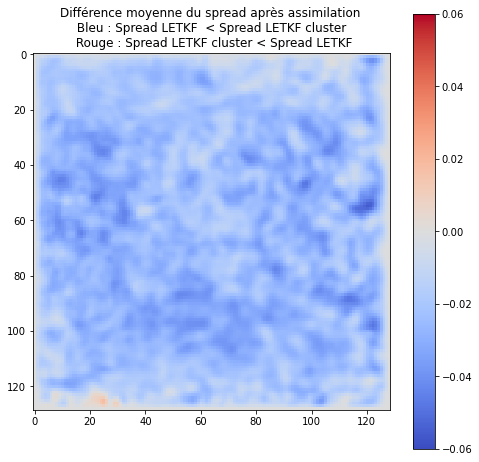

In [23]:

arrays_var_cluster = [np.std(array.T,axis=1) for array in arrays_full_av_cluster]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_cluster = [array.reshape((129, 129),order='F') for array in arrays_var_cluster]


arrays_var_letkf = [np.std(array.T,axis=1) for array in arrays_full_av_letkf]

# Reshape les matrices en 2D (129, 129)
arrays_reshaped_letkf = [array.reshape((129, 129),order='F') for array in arrays_var_letkf]



mean_diff = np.zeros((129,129))
for i, (spread_cluster, spread_classique) in enumerate(zip(arrays_reshaped_cluster, arrays_reshaped_letkf)):
    # Calculer la différence entre les matrices
    difference = spread_classique - spread_cluster
    mean_diff += difference
    
mean_diff = mean_diff/len(arrays_reshaped_cluster)
print(np.max(mean_diff))


cmap = plt.get_cmap('coolwarm')

# Normaliser pour centrer sur 0
norm = colors.TwoSlopeNorm(vmin=mean_diff.min(), vcenter=0, vmax=mean_diff.max())

plt.figure(figsize=(8,8))
# Créer une image avec plt.imshow
plt.imshow(mean_diff, cmap=cmap, vmin = -0.06, vmax = 0.06, interpolation='nearest')
#plt.imshow(mean_diff, cmap=cmap, interpolation='nearest')

# Ajouter une barre de couleur
plt.colorbar()

# Afficher le graphique
plt.title(f"Différence moyenne du spread après assimilation \n Bleu : Spread LETKF  < Spread LETKF cluster \n Rouge : Spread LETKF cluster < Spread LETKF")
plt.savefig(path_cluster_2+"diff_spread_moyen_3xp.png")
plt.show()